### Exercise 5.1

<br>

1) Read the attached file "bank.csv" in the CSV file using pandas. Pay attention to the file delimeter. Inspect the resulting dataframe with respect to the column names and the variable types.

2) Pick data from the following columns to a second dataframe `df2`: `y`, `job`, `marital`, `default`, `housing`, `poutcome`.

3) Convert categorical variables to dummy numerical values using the command

`df3 = pd.get_dummies(df2,columns=['job','marital','default','housing','poutcome'])`

4) Produce a heat map of correlation coefficients for all variables in `df3`. Describe the amount of correlation between the variables in your own words.

5) Select the column called `y` of `df3` as the target variable `y`, and all the remaining columns for the explanatory variables `X`.

6) Split the dataset into training and testing sets with 75/25  ratio.

7) Setup a logistic regression model, train it with training data and predict on testing data.

8) Print the confusion matrix (or use heat map if you want) and accuracy score for the logistic regression model.


### Exercise 5.2

Consider the data from CSV file `weight-height.csv`.

1) Read data into a pandas dataframe.

2) Pick the target variable `y` as weight in kilograms, and the feature variable `X` as height in centimeters.

3) Split the data into training and testing sets with 80/20 ratio.

4) Scale the training and testing data using normalization and standardization.

5) Fit a KNN regression model with `k=5` to the training data without scaling, predict on unscaled testing data and compute the $R^2$ value.



In [1]:
#Exercise 5.1 
# 1.  Read the attached file "bank.csv" in the CSV file using pandas. Pay attention to the file delimeter. Inspect the resulting dataframe with respect to the column names and the variable types.
import pandas as pd

# Step 1: Load the CSV file
# Adjust the file path and delimiter as needed. Default delimiter is ','.
bank_data = pd.read_csv('bank.csv', delimiter=',')  # Change delimiter if the data requires it, e.g., delimiter=';'

# Step 2: Inspect the first few rows of the dataframe
print("First 5 rows of the dataset:")
print(bank_data.head())

# Step 3: Display column names
print("\nColumn names in the dataset:")
print(bank_data.columns)

# Step 4: Display variable types
print("\nData types of each column:")
print(bank_data.dtypes)

# Step 5: Summary statistics (optional but useful for inspection)
print("\nSummary statistics of the dataset:")
print(bank_data.describe(include='all'))  # Include='all' to show stats for both numerical and categorical columns

First 5 rows of the dataset:
  age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"
0  30;"unemployed";"married";"primary";"no";1787;...                                                                                                  
1  33;"services";"married";"secondary";"no";4789;...                                                                                                  
2  35;"management";"single";"tertiary";"no";1350;...                                                                                                  
3  30;"management";"married";"tertiary";"no";1476...                                                                                                  
4  59;"blue-collar";"married";"secondary";"no";0;...                                                                                                  

Column names in the dataset:
Index(['age;"job";"marital";"educat

In [4]:
# 2. Pick data from the following columns to a second dataframe df2: y, job, marital, default, housing, poutcome.
import pandas as pd

# Load the dataset (correcting the delimiter to ';' since the file uses semicolons)
bank_data = pd.read_csv('bank.csv', delimiter=';')

# Clean the column names by stripping spaces and removing extra quotes
bank_data.columns = bank_data.columns.str.strip().str.replace('"', '')

# Inspect the first few rows to verify the data
print("First 5 rows of the dataset:")
print(bank_data.head())

# Print column names to check if they match the expected ones
print("\nColumn names in the dataset:")
print(bank_data.columns)

# Define the columns to select
columns_to_select = ['y', 'job', 'marital', 'default', 'housing', 'poutcome']

# Check if these columns exist in the DataFrame before selecting
missing_columns = [col for col in columns_to_select if col not in bank_data.columns]

if missing_columns:
    print(f"Error: The following columns are missing from the dataset: {missing_columns}")
else:
    # Select the relevant columns
    df2 = bank_data[columns_to_select]
    print("\nDataFrame df2 created successfully with the selected columns:")
    print(df2.head())

First 5 rows of the dataset:
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  

Column names in the dataset:
Index(['age', 'job', 'marital', 'education', 'defaul

In [5]:
# 3. Convert categorical variables to dummy numerical values using the command df3 = pd.get_dummies(df2,columns=['job','marital','default','housing','poutcome'])
# Convert categorical variables to dummy variables (one-hot encoding)
df3 = pd.get_dummies(df2, columns=['job', 'marital', 'default', 'housing', 'poutcome'])

# Display the first few rows of the new DataFrame
print("DataFrame df3 with dummy variables:")
print(df3.head())

DataFrame df3 with dummy variables:
    y  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0  no       False            False             False          False   
1  no       False            False             False          False   
2  no       False            False             False          False   
3  no       False            False             False          False   
4  no       False             True             False          False   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0           False        False              False         False        False   
1           False        False              False          True        False   
2            True        False              False         False        False   
3            True        False              False         False        False   
4           False        False              False         False        False   

   ...  marital_married  marital_single  default_no  def

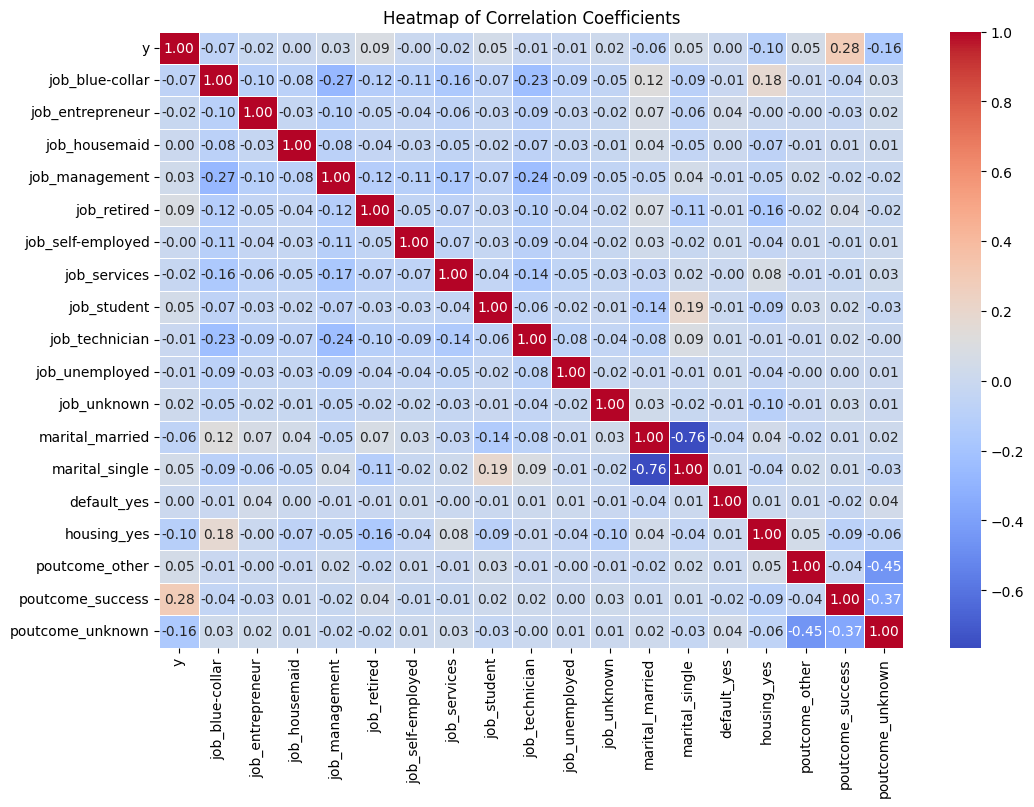

In [9]:
# 4. Produce a heat map of correlation coefficients for all variables in df3. Describe the amount of correlation between the variables in your own words.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create df3 by applying pd.get_dummies to convert categorical columns
df3 = pd.get_dummies(df2, columns=['job', 'marital', 'default', 'housing', 'poutcome'], drop_first=True)

# Step 2: Ensure all columns are numeric for correlation calculation
# If 'y' is still non-numeric (like 'yes'/'no'), convert it to numeric (0, 1)
df3['y'] = df3['y'].map({'no': 0, 'yes': 1})

# Step 3: Calculate the correlation matrix
correlation_matrix = df3.corr()

# Step 4: Plot the heatmap
plt.figure(figsize=(12, 8))  # Set the size of the figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation Coefficients')
plt.show()

In [10]:
#5) Select the column called y of df3 as the target variable y, and all the remaining columns for the explanatory variables X.
# Select the target variable y (the 'y' column)
y = df3['y']

# Select the explanatory variables X (all columns except 'y')
X = df3.drop(columns=['y'])

# Check the shapes of X and y to confirm the separation
print("Shape of X (explanatory variables):", X.shape)
print("Shape of y (target variable):", y.shape)

Shape of X (explanatory variables): (4521, 18)
Shape of y (target variable): (4521,)


In [11]:
# 6) Split the dataset into training and testing sets with 75/25 ratio.
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Check the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3390, 18)
Shape of X_test: (1131, 18)
Shape of y_train: (3390,)
Shape of y_test: (1131,)


Accuracy Score: 0.8983200707338639
Confusion Matrix:
[[997   9]
 [106  19]]


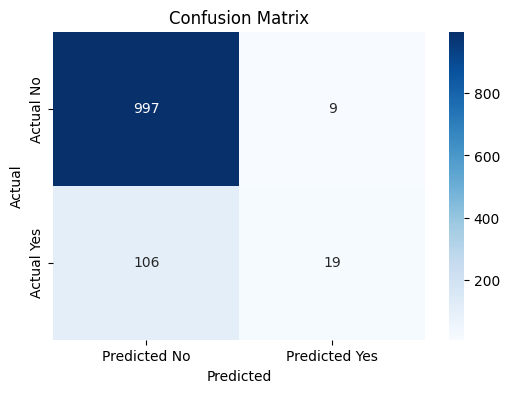

In [12]:
# 7) Setup a logistic regression model, train it with training data and predict on testing data.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence warning occurs

# Step 2: Train the model with the training data
logreg.fit(X_train, y_train)

# Step 3: Predict on the test data
y_pred = logreg.predict(X_test)

# Step 4: Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

# Step 5: Compute and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Step 6: Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Accuracy Score: 0.8983200707338639
Confusion Matrix:
[[997   9]
 [106  19]]


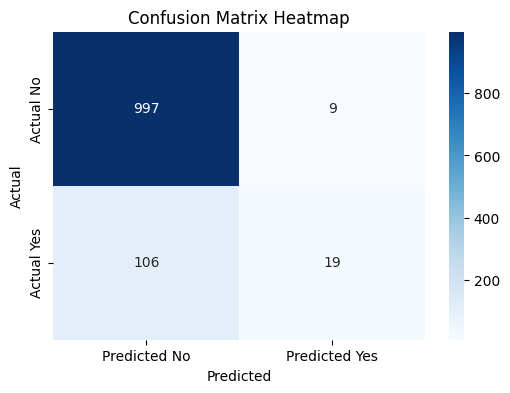

In [13]:
# 8) Print the confusion matrix (or use heat map if you want) and accuracy score for the logistic regression model.
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Make predictions on the test data using the logistic regression model
y_pred = logreg.predict(X_test)

# Step 2: Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

# Step 3: Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 4: Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Step 5: Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))  # Size of the plot
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted No', 'Predicted Yes'], 
            yticklabels=['Actual No', 'Actual Yes'])

# Set plot titles and labels
plt.title("Confusion Matrix Heatmap")
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Show the heatmap
plt.show()

In [17]:
#Exercise 5.2
# 1) Read data into a pandas dataframe.
import pandas as pd

# Step 1: Correctly specify the file path
file_path = r'C:\Users\dell\Desktop\Artificial intelligence with Python\Assignment 5\weight-height (2).csv'

# Step 2: Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Step 3: Display the first few rows to ensure it's read correctly
print(df.head())

  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801


In [18]:
# 2) Pick the target variable y as weight in kilograms, and the feature variable X as height in centimeters.
# Step 1: Assuming the CSV is already read into the DataFrame 'df'
# For example:
# df = pd.read_csv('weight-height.csv')  # You would already have this step done

# Step 2: Select 'weight' as target variable (y) and 'height' as feature variable (X)
y = df['Weight']  # assuming the column for weight is 'Weight'
X = df['Height']  # assuming the column for height is 'Height'

# Display the selected target and feature variable
print("Target variable (y) - Weight:\n", y.head())  # Display first few rows of target variable
print("Feature variable (X) - Height:\n", X.head())  # Display first few rows of feature variable

Target variable (y) - Weight:
 0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64
Feature variable (X) - Height:
 0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64


In [19]:
# 3) Split the data into training and testing sets with 80/20 ratio.
from sklearn.model_selection import train_test_split

# Assuming you already have X (height) and y (weight) as defined in previous steps

# Step 1: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Display the size of training and testing sets
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 8000
Testing set size: 2000


In [21]:
# 4) Scale the training and testing data using normalization and standardization.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Step 1: Load the dataset
df = pd.read_csv(r'C:\Users\dell\Desktop\Artificial intelligence with Python\Assignment 5\weight-height (2).csv')

# Step 2: Select features (X) and target (y)
X = df['Height'].values.reshape(-1, 1)  # Feature: Height in cm
y = df['Weight'].values.reshape(-1, 1)  # Target: Weight in kg

# Step 3: Split the dataset into training and testing sets with 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize the scalers for normalization and standardization
min_max_scaler = MinMaxScaler()    # For normalization (scaling between 0 and 1)
standard_scaler = StandardScaler() # For standardization (mean=0, std=1)

# Step 5: Fit and transform the training data for both normalization and standardization
X_train_normalized = min_max_scaler.fit_transform(X_train)  # Normalize training data
X_train_standardized = standard_scaler.fit_transform(X_train)  # Standardize training data

# Step 6: Transform the testing data using the same scalers
X_test_normalized = min_max_scaler.transform(X_test)  # Normalize testing data
X_test_standardized = standard_scaler.transform(X_test)  # Standardize testing data

# Output the first few rows to verify the scaling
print("Normalized X_train:\n", X_train_normalized[:5])  # Show first 5 rows of normalized data
print("Standardized X_train:\n", X_train_standardized[:5])  # Show first 5 rows of standardized data

Normalized X_train:
 [[0.28818819]
 [0.82611687]
 [0.57587754]
 [0.46630679]
 [0.52146168]]
Standardized X_train:
 [[-1.29189725]
 [ 2.16821664]
 [ 0.5586044 ]
 [-0.14618656]
 [ 0.20858579]]


In [22]:
# 5) Fit a KNN regression model with k=5 to the training data without scaling, predict on unscaled testing data and compute the R2 value.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Step 1: Load the dataset
df = pd.read_csv(r'C:\Users\dell\Desktop\Artificial intelligence with Python\Assignment 5\weight-height (2).csv')

# Step 2: Select features (X) and target (y)
X = df['Height'].values.reshape(-1, 1)  # Feature: Height in cm
y = df['Weight'].values.reshape(-1, 1)  # Target: Weight in kg

# Step 3: Split the dataset into training and testing sets with 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize the KNN regressor with k=5
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Step 5: Fit the KNN model on the unscaled training data
knn_regressor.fit(X_train, y_train)

# Step 6: Predict on the unscaled testing data
y_pred = knn_regressor.predict(X_test)

# Step 7: Compute the R² (R-squared) value for the model
r2 = r2_score(y_test, y_pred)

# Output the results
print("Predicted values on test data:", y_pred[:5])  # Show first 5 predictions
print("R² (R-squared) value:", r2)

Predicted values on test data: [[177.369952  ]
 [179.35132074]
 [166.13059639]
 [207.23408679]
 [158.38817156]]
R² (R-squared) value: 0.8346485438169171
